<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20520863/MCMC_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd
from random import random 
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [3]:
df= pd.read_csv("/content/DELL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,21.777945,22.993132,21.693752,22.440264,21.538488,13801490
1,2017-12-04,22.504812,22.521650,20.952852,21.017401,20.172804,8513645
2,2017-12-05,20.927595,21.278399,20.644144,20.899530,20.059669,6129126
3,2017-12-06,20.767628,21.182980,20.697468,21.065109,20.218596,7828790
4,2017-12-07,21.278399,21.601139,21.205433,21.298044,20.442171,7163534
...,...,...,...,...,...,...,...
1355,2023-04-24,42.700001,42.869999,42.369999,42.680000,42.680000,2814400
1356,2023-04-25,42.599998,42.669998,41.700001,41.709999,41.709999,2396000
1357,2023-04-26,41.750000,42.189999,41.470001,41.669998,41.669998,2501400
1358,2023-04-27,41.830002,42.810001,41.790001,42.799999,42.799999,2988500


In [4]:
start_date = '2017-12-01' 
end_date = '2023-04-28' 
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [5]:
days = [i for i in range(1, len(df['Close'])+1)] 
price_orig = df['Close'].tolist() 
change = df['Close'].pct_change().tolist() 
change = change[1:]

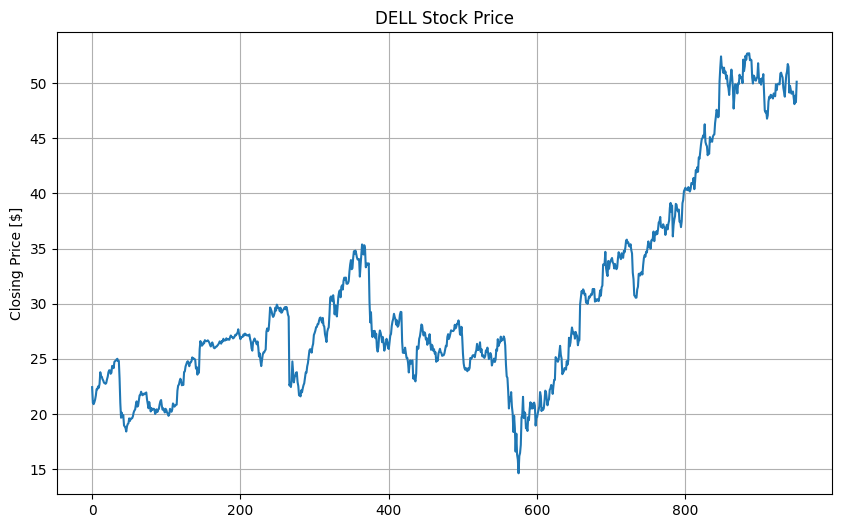

In [6]:
train_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6]) 
plt.grid()

In [7]:
mean = np.mean(change)
std_dev = np.std(change) 
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%') 
print('Standard Deviation of percent change: ' + str(round(std_dev*100, 2)) + '%')


Mean percent change: 0.08%
Standard Deviation of percent change: 2.41%


In [10]:
simulations = 1 
days_to_sim = 1*252
close_end = [] 
above_close = []

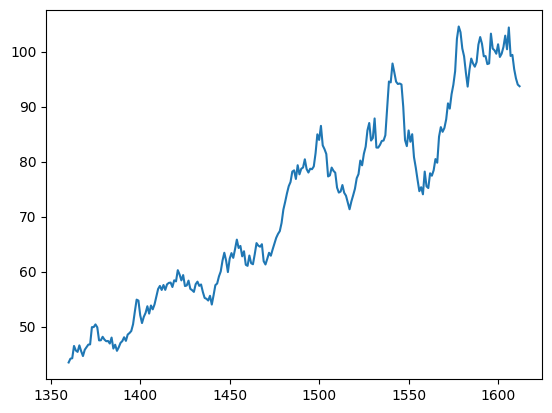

In [11]:
for i in range(simulations):
   num_days = [days[-1]] 
   close_price = [df.iloc[-1, 4]]
   for j in range(days_to_sim):
     num_days.append(num_days[-1]+1) 
     perc_change = norm.ppf(random(), loc=mean, scale=std_dev) 
     close_price.append(close_price[-1]*(1+perc_change))
       
  
   if close_price[-1] > price_orig[-1]:   
     above_close.append(1) 
   else:
      above_close.append(0) 
   close_end.append(close_price[-1]) 
   plt.plot(num_days, close_price)

In [12]:

average_closing_price = sum(close_end)/simulations 
average_perc_change = (average_closing_price- price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations 
print('\nPredicted closing price after ' + str(simulations) + ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + str(round(average_perc_change*100, 2)) + '%') 
print('Probability of stock price increasing after 1 year: ' + str(round(probability_of_increase*100, 2)) + '%')
plt.show()


Predicted closing price after 1 simulations: $93.69
Predicted percent increase after 1 year: 115.44%
Probability of stock price increasing after 1 year: 100.0%


In [15]:
mean_end_price = round(np.mean(close_price),2)
print("Expected price: ", str(mean_end_price))

Expected price:  71.79


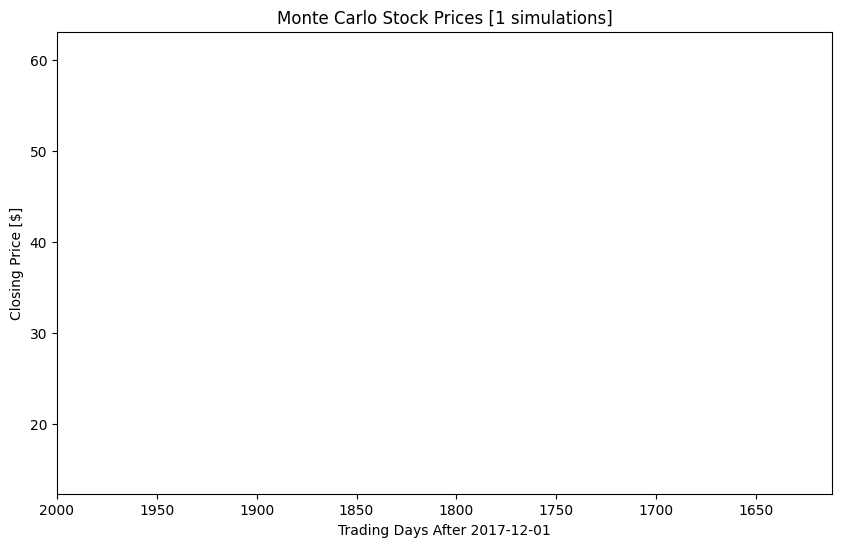

In [16]:
fig = plt.figure(figsize=[10, 6]) 
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + " simulations]")
plt.xlabel("Trading Days After " + start_date  ) 
plt.ylabel("Closing Price [$]") 
plt.xlim([2000, len(days)+days_to_sim]) 
plt.show()

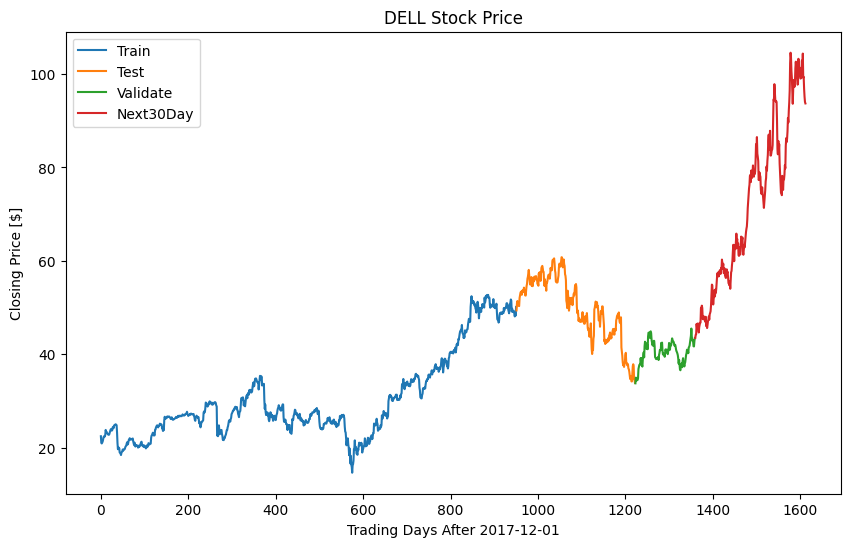

In [18]:

plt.xlabel("Trading Days After " + start_date  ) 
plt.ylabel("Closing Price [$]") 
train_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6]) 
test_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6]) 
val_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6]) 
plt.plot(num_days, close_price)
plt.legend(['Train', 'Test','Validate','Next30Day'])
plt.show()